In [2]:
from train import Asynchronous_Simulator

In [3]:
def train_adaptive(model):

  loss_list = []
  acc_list = []

  lrs = [0.02, 0.01, 0.005, 0.002, 0.001, 0.0005]
  for lr in lrs:
    loss, acc = model.train(max_epoch=1, lr = lr)
    loss_list += loss
    acc_list += acc
  model.test()
  return loss_list, acc_list

def train_momentum(model):

  loss_list = []
  acc_list = []

  lrs = [0.001, 0.001, 0.0005, 0.0005, 0.0002, 0.0001]
  for lr in lrs:
    loss, acc = model.train(max_epoch=1, lr = lr, momentum = 0.9)
    loss_list += loss
    acc_list += acc
  model.test()
  return loss_list, acc_list

## Train the ASGD model with different number of workers

In [ ]:
import numpy as np

nums = [1, 10, 20, 30, 40, 50, 70, 100]
result_loss = []
result_acc = []

for num in nums:
  test = Asynchronous_Simulator(num_workers=num)
  loss, acc = train_adaptive(test)
  np.save("loss_"+str(num)+".npy", np.array(loss))
  np.save("accuracy_"+str(num)+".npy", np.array(acc))
  result_loss.append(loss)
  result_acc.append(acc)

## Train the ASGD model with momentum

In [ ]:
# nums = [50]
import numpy as np

for num in nums:
  test = Asynchronous_Simulator(num_workers=num)
  loss, acc = train_momentum(test)
  np.save("momentum_worker_" + str(num) + ".npy", np.array([loss, acc]))


## Train the SGD+dropout model

In [ ]:
# dropout = [0, 1]
dropout = [0, 1, 3, 5, 7, 9]

for rate in dropout:
  test = Asynchronous_Simulator(num_workers=1, model_name="small_drop_"+str(rate))
  loss, acc = train_adaptive(test)
  np.save("drop_" + str(rate) + ".npy", np.array([loss, acc]))

In [5]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np

## Plot the ASGD result

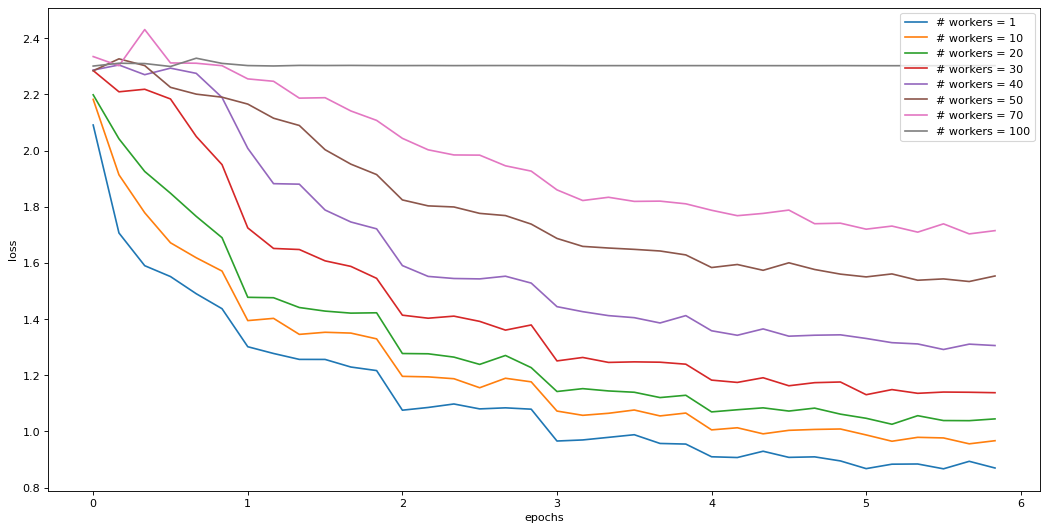

In [12]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
figure(figsize=(16, 8), dpi=80)

nums = [1,10,20,30,40,50,70,100]

for num in nums:
    a = np.load("loss_"+str(num)+".npy")
    x = [i/6 for i in range(len(a))]
    plt.plot(x, a, label = "# workers = " + str(num))
    plt.ylabel('loss')
    plt.xlabel('epochs')


plt.legend(loc="upper right")
plt.savefig('ASGD_loss.png')
plt.show()


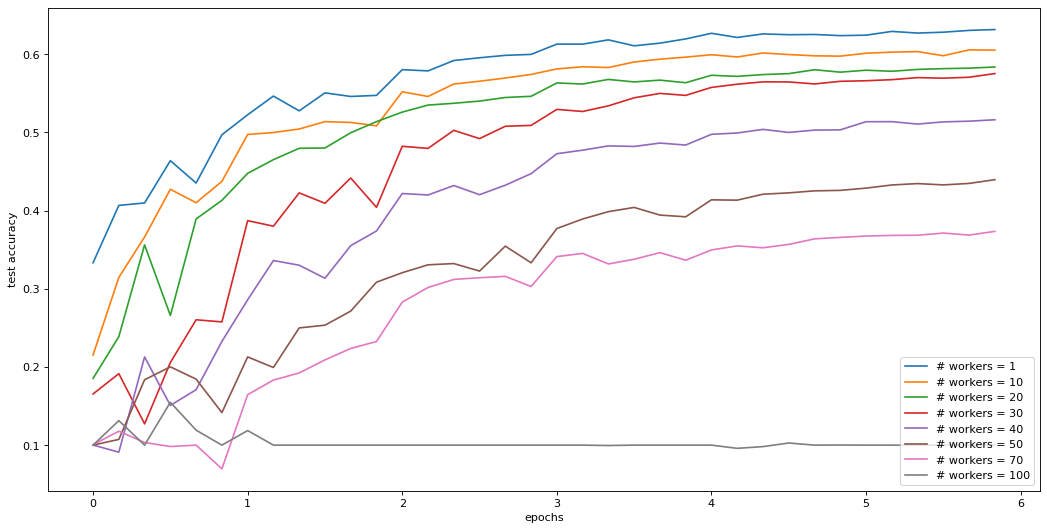

In [13]:
figure(figsize=(16, 8), dpi=80)
for num in nums:
    a = np.load("accuracy_"+str(num)+".npy")
    x = [i/6 for i in range(len(a))]
    plt.plot(x, a, label = "# workers = " + str(num))
    plt.ylabel('test accuracy')
    plt.xlabel('epochs')

plt.legend(loc="lower right")
plt.savefig('ASGD_acc.png')
plt.show()

## Plot the comparison between ASGD and ASGD with momentum

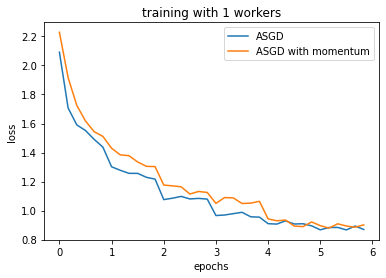

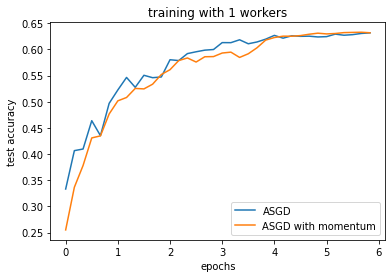

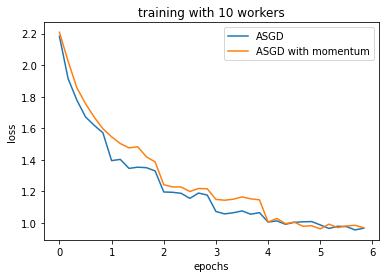

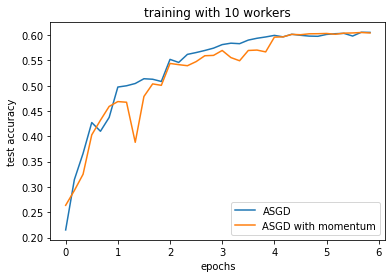

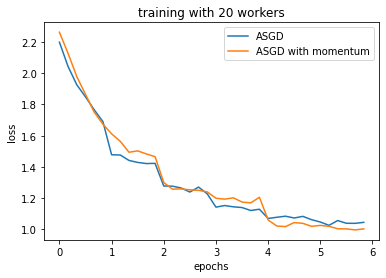

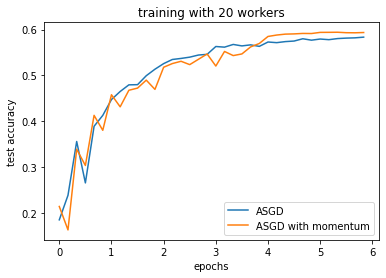

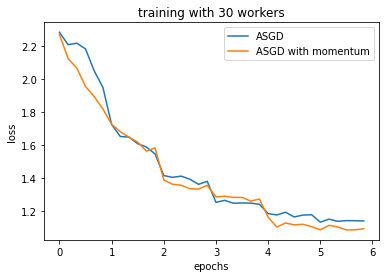

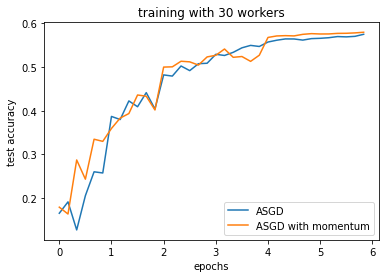

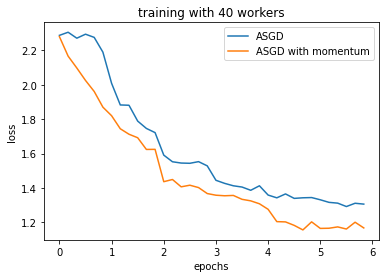

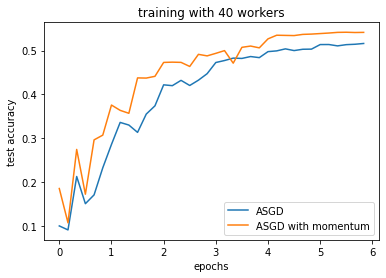

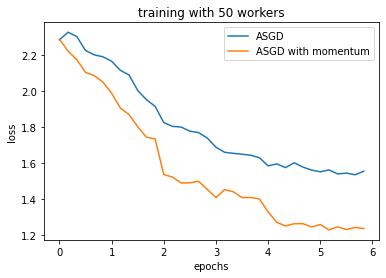

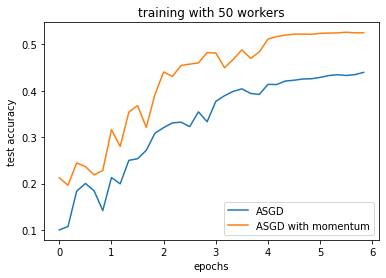

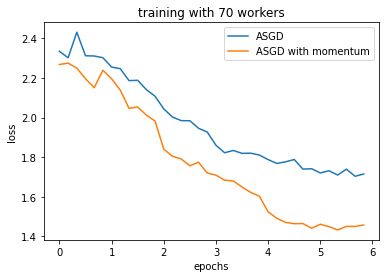

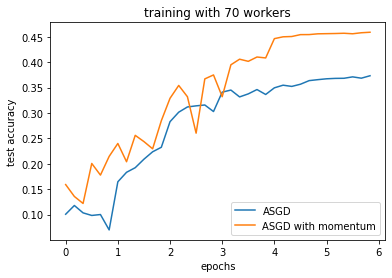

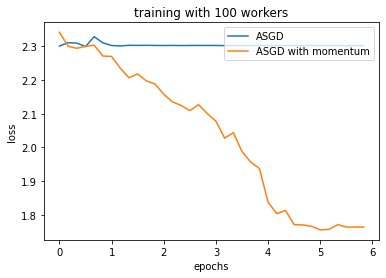

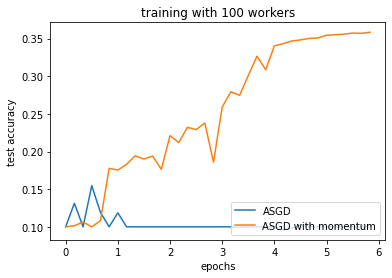

In [14]:
for worker_num in [1,10,20,30,40,50,70,100]:
  num = worker_num
  data = np.load('momentum_worker_{}.npy'.format(str(worker_num)))
  a = np.load("loss_"+str(num)+".npy")
  b = np.load("accuracy_"+str(num)+".npy")
  x = [i/6 for i in range(len(a))]

  plt.plot(x, a, label = "ASGD")
  plt.plot(x, data[0], label = "ASGD with momentum")
  plt.ylabel('loss')
  plt.title("training with " + str(num) + " workers")
  plt.legend(loc="upper right")
  plt.xlabel('epochs')
  plt.savefig(str(num) + 'worker_loss.png')

  plt.show()

  plt.plot(x, b, label = "ASGD")
  plt.plot(x, data[1], label = "ASGD with momentum")
  plt.ylabel('test accuracy')
  plt.title("training with " + str(num) + " workers")
  plt.legend(loc="lower right")
  plt.xlabel('epochs')
  plt.savefig(str(num) + 'worker_acc.png')

  plt.show()

## Plot the SGD+dropout result

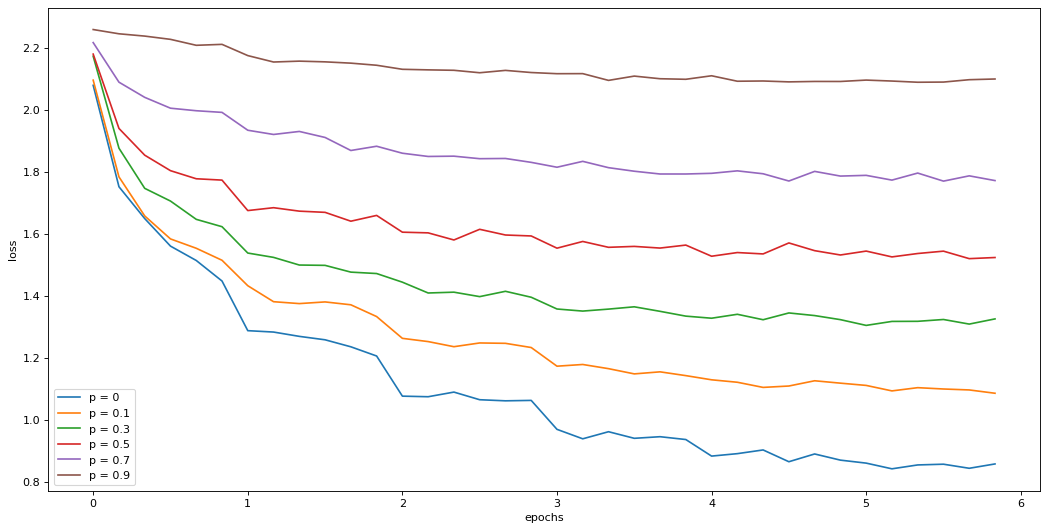

In [19]:
figure(figsize=(16, 8), dpi=80)

dropout_rates = [0, 0.1, 0.3, 0.5, 0.7, 0.9]

for rate in dropout_rates:
    a = np.load("drop_"+str(int(rate*10))+".npy")
    x = [i/6 for i in range(len(a[0]))]
    plt.plot(x, a[0], label = "p = " + str(rate))
    plt.ylabel('loss')
    plt.xlabel('epochs')


plt.legend(loc="lower left")
plt.savefig('Dropout_loss.png')
plt.show()

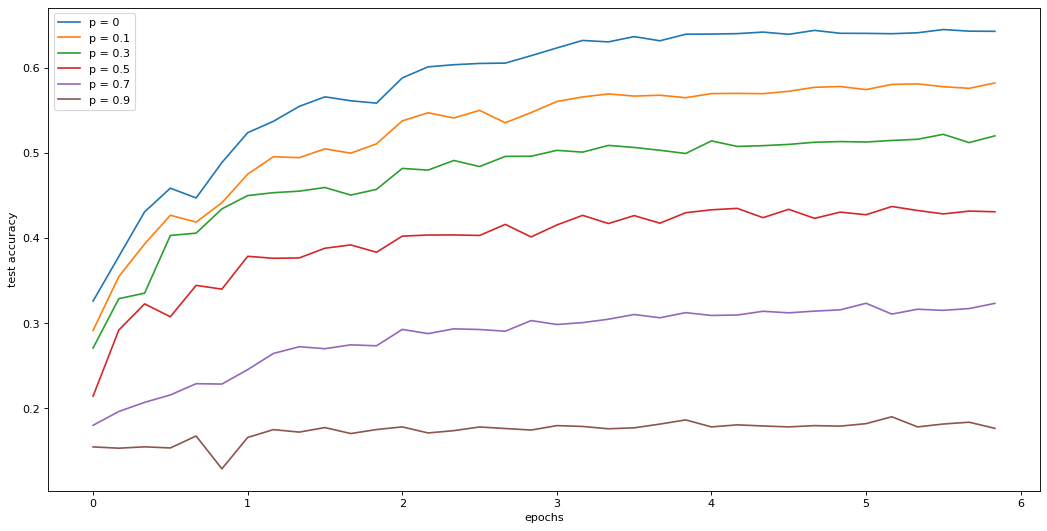

In [21]:
figure(figsize=(16, 8), dpi=80)

dropout_rates = [0, 0.1, 0.3, 0.5, 0.7, 0.9]

for rate in dropout_rates:
    a = np.load("drop_"+str(int(rate*10))+".npy")
    x = [i/6 for i in range(len(a[0]))]
    plt.plot(x, a[1], label = "p = " + str(rate))
    plt.ylabel('test accuracy')
    plt.xlabel('epochs')


plt.legend(loc="upper left")
plt.savefig('Dropout_acc.png')
plt.show()